<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
import io
from google.colab import files

In [3]:
uploaded = files.upload()

Saving 0041-83493_Rev07.csv to 0041-83493_Rev07.csv


In [4]:
dataset = pd.read_csv(io.BytesIO(uploaded['0041-83493_Rev07.csv']))

In [5]:
dataset

,SN (JOB #),SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220,SH1_B5_Diameter -0.160,SH1_B5_Position -0.005,SH1_B1_Width -0.190,SH1_B1_Distance -0.200,SH1_B1_Position- 0.002,SH1_D5_Position -0.005,SH2_D7_Width -0.190,...,SH4_B7_Width -0.065,SH3_B8_Position -0.005,SH3_B7_Distance -0.100,SH4_C7_Radius -0.0325,SH4_D8_Distance -0.470,SH4_D8_Distance -0.235,SH4_B7_Distance -0.148,SH4_C7_Distance -0.118,SH2_B8_Angle -5 Deg,SH2_C7_Distance -6.000_R
0,IPI-001_SN0001 (CP467059),14.017400,0.222300,0.161250,0.000700,0.192200,0.198800,0.000000,0.001100,0.192200,...,0.068400,0.001200,0.098950,0.033800,0.473750,0.236300,0.147450,0.117250,5.040300,6.000200
1,0 DEG SN 0002 (CP471589),14.016011,0.221733,0.161174,0.000481,0.191812,0.200574,0.000000,0.001154,0.191750,...,0.067757,0.002455,0.102773,0.033507,0.470759,0.234603,0.147419,0.117412,5.056671,6.000013
2,90 DEG SN 0003 (CP471589),14.015942,0.221904,0.161202,0.000903,0.191788,0.200091,0.000000,0.001015,0.191730,...,0.067760,0.001692,0.102942,0.033518,0.470711,0.234614,0.147386,0.117469,5.050116,5.999963
3,180 DEG SN 0004 (CP471589),14.018477,0.221841,0.161174,0.000434,0.191770,0.200465,0.000000,0.001113,0.191971,...,0.067707,0.002165,0.102567,0.033509,0.470742,0.234636,0.147522,0.117474,5.050046,6.000079
4,SN0005 270DEG (CP471589),14.016071,0.221928,0.161158,0.000481,0.191820,0.200294,0.000000,0.000876,0.191710,...,0.067761,0.001043,0.102188,0.033508,0.470712,0.234519,0.147350,0.117411,5.045632,5.999966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,SN 301514-5021-0256 (CP474149_REV08),14.015503,0.221326,0.160738,0.000396,0.191336,0.200956,0.000008,0.001500,0.191257,...,0.067776,0.000313,0.098899,0.033551,0.472191,0.236373,0.148387,0.118398,5.046470,5.998720
88,SN 301514-5021-0257 (CP474149_REV08),14.015220,0.221238,0.160695,0.001317,0.191349,0.200278,0.000000,0.001034,0.191284,...,0.067780,0.001097,0.098601,0.033503,0.472068,0.236322,0.148331,0.118553,5.044330,6.000287
89,SN 301514-5021-0258 (CP474149_REV08),14.015178,0.221296,0.160680,0.000526,0.191342,0.200183,0.000000,0.000821,0.191169,...,0.067780,0.000545,0.098496,0.033497,0.471922,0.236317,0.148301,0.118640,5.044763,6.000126
90,SN 301514-5021-0259 (CP474149_REV08),14.017048,0.221358,0.160751,0.000183,0.191340,0.200260,0.000000,0.000817,0.191211,...,0.067777,0.000742,0.098684,0.033505,0.471981,0.236307,0.148213,0.118508,5.046067,6.000382


In [6]:
X = dataset.iloc[:, [1, 2]].values

In [7]:
print(X)

[[14.0174    0.2223  ]
 [14.016011  0.221733]
 [14.015942  0.221904]
 [14.018477  0.221841]
 [14.016071  0.221928]
 [14.016715  0.221905]
 [14.01652   0.22193 ]
 [14.017058  0.221886]
 [14.017333  0.221834]
 [14.016382  0.221859]
 [14.01643   0.221896]
 [14.015969  0.221888]
 [14.015904  0.221868]
 [14.01671   0.221922]
 [14.017094  0.221913]
 [14.015875  0.221904]
 [14.015689  0.22191 ]
 [14.016832  0.221927]
 [14.016755  0.221912]
 [14.016367  0.221875]
 [14.018125  0.221926]
 [14.017755  0.221921]
 [14.017335  0.221925]
 [14.017093  0.221907]
 [14.016819  0.221931]
 [14.017705  0.221942]
 [14.016766  0.221939]
 [14.017205  0.221934]
 [14.015922  0.221921]
 [14.016522  0.221908]
 [14.016131  0.221921]
 [14.016922  0.221917]
 [14.01698   0.221916]
 [14.018163  0.221931]
 [14.017214  0.221908]
 [14.016993  0.221913]
 [14.016838  0.221909]
 [14.017674  0.221911]
 [14.016728  0.221887]
 [14.016791  0.221913]
 [14.01673   0.22191 ]
 [14.017064  0.221908]
 [14.016716  0.221939]
 [14.017294

In [8]:
dataset.shape

(92, 129)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 129 entries, SN (JOB #) to SH2_C7_Distance -6.000_R
dtypes: float64(127), int64(1), object(1)
memory usage: 92.8+ KB


# Taking care of missing data

Impute Missing Values. 

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [11]:
print(X)

[[14.0174    0.2223  ]
 [14.016011  0.221733]
 [14.015942  0.221904]
 [14.018477  0.221841]
 [14.016071  0.221928]
 [14.016715  0.221905]
 [14.01652   0.22193 ]
 [14.017058  0.221886]
 [14.017333  0.221834]
 [14.016382  0.221859]
 [14.01643   0.221896]
 [14.015969  0.221888]
 [14.015904  0.221868]
 [14.01671   0.221922]
 [14.017094  0.221913]
 [14.015875  0.221904]
 [14.015689  0.22191 ]
 [14.016832  0.221927]
 [14.016755  0.221912]
 [14.016367  0.221875]
 [14.018125  0.221926]
 [14.017755  0.221921]
 [14.017335  0.221925]
 [14.017093  0.221907]
 [14.016819  0.221931]
 [14.017705  0.221942]
 [14.016766  0.221939]
 [14.017205  0.221934]
 [14.015922  0.221921]
 [14.016522  0.221908]
 [14.016131  0.221921]
 [14.016922  0.221917]
 [14.01698   0.221916]
 [14.018163  0.221931]
 [14.017214  0.221908]
 [14.016993  0.221913]
 [14.016838  0.221909]
 [14.017674  0.221911]
 [14.016728  0.221887]
 [14.016791  0.221913]
 [14.01673   0.22191 ]
 [14.017064  0.221908]
 [14.016716  0.221939]
 [14.017294

Check the percentage of missing values in each variable.

In [12]:
dataset.isnull().sum()/len(dataset)*100

SN (JOB #)                  0.0
SH1_C2_Diameter -14.020     0.0
SH1_B5_Diameter -0.220      0.0
SH1_B5_Diameter -0.160      0.0
SH1_B5_Position -0.005      0.0
                           ... 
SH4_D8_Distance -0.235      0.0
SH4_B7_Distance -0.148      0.0
SH4_C7_Distance -0.118      0.0
SH2_B8_Angle -5 Deg         0.0
SH2_C7_Distance -6.000_R    0.0
Length: 129, dtype: float64

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, :] = sc.fit_transform(X[:, :])

Low Variance Filter: Calculate the variance of all the numerical variables

In [14]:
dataset.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SH1_C2_Diameter -14.020     6.191677e-07
SH1_B5_Diameter -0.220      6.616313e-08
SH1_B5_Diameter -0.160      3.108320e-08
SH1_B5_Position -0.005      2.757916e-07
SH1_B1_Width -0.190         4.480541e-08
                                ...     
SH4_D8_Distance -0.235      2.437664e-07
SH4_B7_Distance -0.148      9.221709e-08
SH4_C7_Distance -0.118      1.792112e-07
SH2_B8_Angle -5 Deg         2.523954e-05
SH2_C7_Distance -6.000_R    1.815356e-07
Length: 128, dtype: float64

High Correlation Filter

In [15]:
df=dataset.drop('SN (JOB #)', 1)
df.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220,SH1_B5_Diameter -0.160,SH1_B5_Position -0.005,SH1_B1_Width -0.190,SH1_B1_Distance -0.200,SH1_B1_Position- 0.002,SH1_D5_Position -0.005,SH2_D7_Width -0.190,SH2_D7_Distance -0.20,...,SH4_B7_Width -0.065,SH3_B8_Position -0.005,SH3_B7_Distance -0.100,SH4_C7_Radius -0.0325,SH4_D8_Distance -0.470,SH4_D8_Distance -0.235,SH4_B7_Distance -0.148,SH4_C7_Distance -0.118,SH2_B8_Angle -5 Deg,SH2_C7_Distance -6.000_R
SH1_C2_Diameter -14.020,1.000000,0.236855,0.202132,0.043446,0.234478,0.121288,-0.161457,-0.090562,0.269238,0.087640,...,0.142655,0.132724,0.142259,0.048847,0.103762,-0.021893,-0.127674,-0.002433,-0.049315,0.043954
SH1_B5_Diameter -0.220,0.236855,1.000000,0.954243,0.315648,0.984561,0.580135,-0.168657,-0.351653,0.938813,0.125861,...,0.299798,0.033777,0.292553,0.114572,-0.202946,-0.608491,-0.567047,0.037350,-0.213918,-0.016875
SH1_B5_Diameter -0.160,0.202132,0.954243,1.000000,0.236856,0.942768,0.636577,-0.047230,-0.372631,0.878740,0.197014,...,0.213700,0.030323,0.363291,0.035743,-0.219533,-0.651181,-0.632631,0.003163,-0.171620,0.026702
SH1_B5_Position -0.005,0.043446,0.315648,0.236856,1.000000,0.284504,0.056151,0.060427,0.270826,0.297101,-0.231548,...,0.259377,0.182321,0.000540,0.179780,-0.084689,-0.203417,-0.154518,0.215421,-0.510653,0.069473
SH1_B1_Width -0.190,0.234478,0.984561,0.942768,0.284504,1.000000,0.600869,-0.209377,-0.348644,0.938958,0.132342,...,0.301111,0.052054,0.288314,0.113175,-0.220691,-0.630761,-0.578007,-0.009052,-0.193676,-0.018965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SH4_D8_Distance -0.235,-0.021893,-0.608491,-0.651181,-0.203417,-0.630761,-0.404162,0.209600,0.270203,-0.590412,0.098843,...,-0.016327,-0.295164,-0.438173,0.081967,0.725581,1.000000,0.753857,0.465131,-0.025073,-0.157445
SH4_B7_Distance -0.148,-0.127674,-0.567047,-0.632631,-0.154518,-0.578007,-0.228359,0.006032,0.201876,-0.526554,0.225052,...,-0.342896,-0.268506,-0.511188,-0.186356,0.173790,0.753857,1.000000,0.604721,-0.121405,-0.191437
SH4_C7_Distance -0.118,-0.002433,0.037350,0.003163,0.215421,-0.009052,0.294344,0.193847,0.002216,-0.026401,0.269236,...,-0.254092,-0.428236,-0.202484,-0.129899,0.160850,0.465131,0.604721,1.000000,-0.330523,-0.282643
SH2_B8_Angle -5 Deg,-0.049315,-0.213918,-0.171620,-0.510653,-0.193676,-0.200453,-0.114379,-0.141098,-0.191471,-0.091812,...,-0.223977,0.145218,0.387386,-0.133253,-0.150286,-0.025073,-0.121405,-0.330523,1.000000,-0.026942


# Using the dendrogram to find the optimal number of clusters

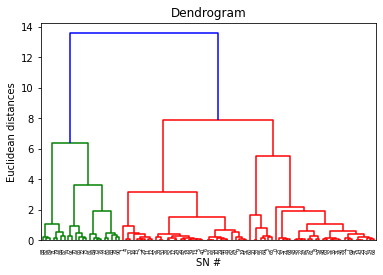

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('SN #')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [21]:
print(y_hc)

[1 2 2 4 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 4 1 1 1 2 1 2 1 2 2 2 1 1 4 1 1 2
 1 2 2 2 1 2 1 2 1 1 1 1 2 2 2 2 2 1 4 2 2 1 1 4 1 2 1 4 4 1 2 1 1 0 3 0 0
 0 0 0 0 0 3 0 0 3 0 0 0 3 3 3 3 0 0]


# Visualising the clusters

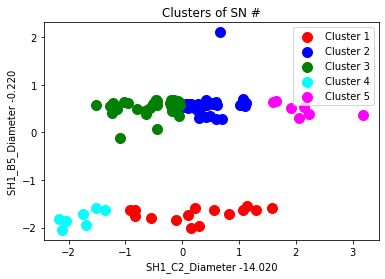

In [20]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of SN #')
plt.xlabel('SH1_C2_Diameter -14.020')
plt.ylabel('SH1_B5_Diameter -0.220')
plt.legend()
plt.show()